# Parkinson Classification with Omega

Parkinson classification using brain functional connectivity computed on the alpha frequency band and resting-state MEG signals from the OMEGA dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from get_data_omega import get_data_omega
from select_features import select_features
from get_features import get_features_name
from model_classif import classif

'''
frequency_bands = {
    "delta": (0.3, 4),
    "theta": (4.0, 8.0),
    "alpha": (8.0, 12.0),
    "beta": (12.0, 30.0),
    "gamma": (30.0, 60.0)
}
'''
frequency_bands = {"alpha": (8.0, 12.0)}

We load the data and compute the connectivity for each subject and get the class.

In [2]:
X, y, subjects, sensors = get_data_omega(frequency_bands)

In [3]:
X

,alpha
0,"[[4.242404908671065e-07, 1.644641239761263e-07..."


In [4]:
X.loc[0,'alpha']

array([[4.24240491e-07, 1.64464124e-07, 4.01710811e-07, ...,
        1.54920484e-07, 1.60070308e-07, 5.26260370e-08],
       [6.78002332e-07, 2.27377821e-07, 6.78897718e-07, ...,
        3.31677679e-08, 2.35972753e-07, 1.35902954e-07],
       [5.10895551e-07, 2.63879089e-08, 3.52589165e-07, ...,
        2.40901215e-07, 2.91525790e-07, 1.81293777e-08],
       ...,
       [7.61277321e-07, 3.59456119e-07, 8.43303886e-07, ...,
        1.78834769e-07, 1.27530741e-07, 7.77826147e-09],
       [5.41498285e-07, 7.15633341e-08, 5.47030340e-07, ...,
        2.86948482e-08, 1.73005103e-07, 1.19839309e-08],
       [6.65940331e-07, 6.36729331e-08, 6.11906887e-07, ...,
        1.92178086e-08, 8.67571097e-08, 1.82911846e-07]])

There are 285 subjects and 34191 features (262 sensors, we keep the lower triangle without the diagonal : 262 * 261 / 2)

In [5]:
X.loc[0,'alpha'].shape

(285, 34191)

Visualisation of the connectivity of the 5 first subjects.

Control


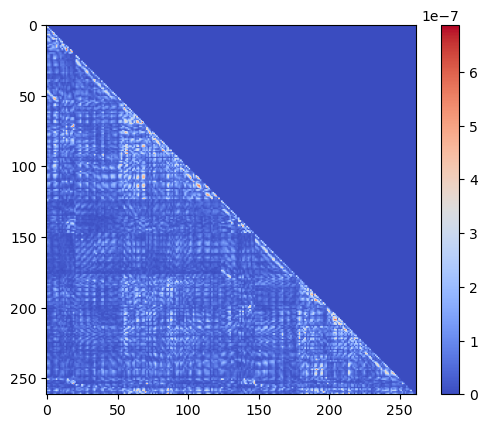

Parkinson


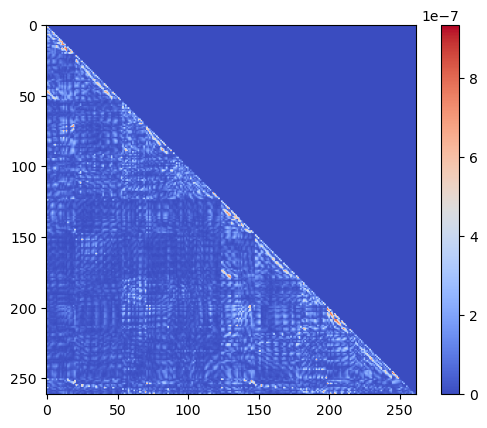

Parkinson


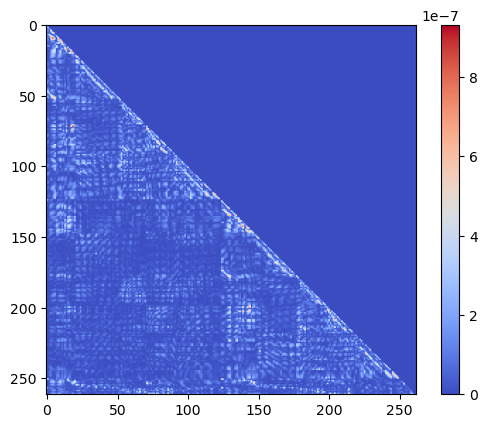

Parkinson


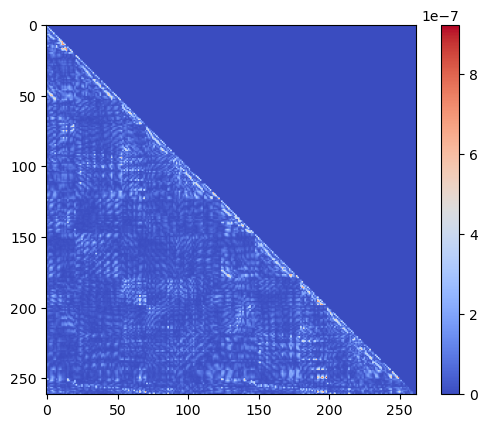

Parkinson


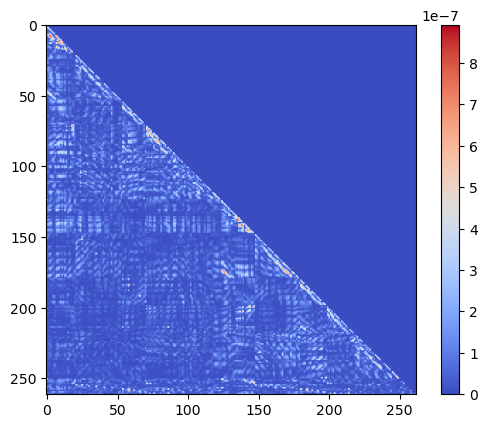

Parkinson


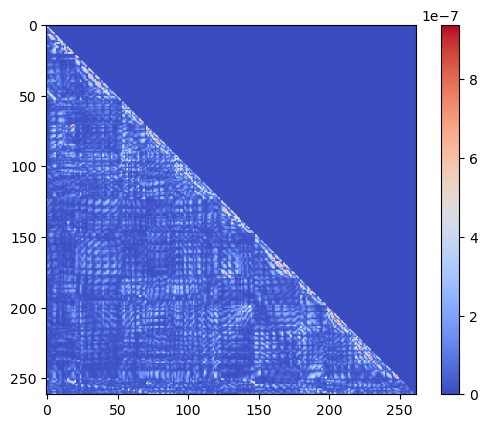

In [6]:
for i, data in enumerate(X.loc[0, 'alpha']):
    a = np.zeros((262,262))
    indices = np.tril_indices(262, -1)
    a[indices] = data
    print(y[i])
    plt.imshow(a, cmap = 'coolwarm')
    plt.colorbar()
    plt.show()
    if i == 5:
        break

Feature selection with Neighborhood Component Analysis (NCA).

In [7]:
features = select_features(X, y, frequency_bands)

Fold 0
Model: KNeighborsClassifier
Score: 0.0
Model: SVC
Score: 1.0
Model: DecisionTreeClassifier
Score: 1.0
Fold 1
Model: KNeighborsClassifier
Score: 0.0
Model: SVC
Score: 0.0
Model: DecisionTreeClassifier
Score: 0.0
Fold 2
Model: KNeighborsClassifier
Score: 1.0
Model: SVC
Score: 0.0
Model: DecisionTreeClassifier
Score: 0.0
Fold 3
Model: KNeighborsClassifier
Score: 0.0
Model: SVC
Score: 0.0
Model: DecisionTreeClassifier
Score: 0.0
Fold 4
Model: KNeighborsClassifier
Score: 1.0
Model: SVC
Score: 0.0
Model: DecisionTreeClassifier
Score: 0.0
Fold 5
Model: KNeighborsClassifier
Score: 0.0
Model: SVC
Score: 0.0
Model: DecisionTreeClassifier
Score: 0.0
Fold 6
Model: KNeighborsClassifier
Score: 1.0
Model: SVC
Score: 0.0
Model: DecisionTreeClassifier
Score: 0.0
Fold 7
Model: KNeighborsClassifier
Score: 1.0
Model: SVC
Score: 1.0
Model: DecisionTreeClassifier
Score: 1.0
Fold 8
Model: KNeighborsClassifier
Score: 1.0
Model: SVC
Score: 0.0
Model: DecisionTreeClassifier
Score: 0.0
Fold 9
Model: KNeig

In [8]:
features

{'alpha': array([False, False, False, ..., False, False,  True])}

In [9]:
names = get_features_name(features, sensors, frequency_bands)
names

{'alpha': {0: ('MRF14', 'MLO31'),
  1: ('MRF14', 'MLO32'),
  2: ('MRF14', 'MLO33'),
  3: ('MRF14', 'MLP31'),
  4: ('MZP01', 'MZO03')}}

Scores computed with a Leave-One-Out cross validation.

In [10]:
scores = classif(X, y, features, frequency_bands)
scores

{'alpha': {'KNeighborsClassifier': {'mean_test_accuracy': 0.543859649122807,
   'mean_test_balanced_accuracy': 0.543859649122807},
  'SVC': {'mean_test_accuracy': 0.512280701754386,
   'mean_test_balanced_accuracy': 0.512280701754386},
  'DecisionTreeClassifier': {'mean_test_accuracy': 0.5614035087719298,
   'mean_test_balanced_accuracy': 0.5614035087719298}}}